In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,roc_auc_score
from yellowbrick.regressor import prediction_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv("../Data/DataRepo.csv")

y = data["CO basale"]
df=pd.DataFrame(data)
df["CO basale"] = y
df

,ID,Age,Gender,Weight,Height,BMI,Eziologia,NYHA,Causa interruzione test,Ramp_protocol CPET,...,Antialdo,Digitalis,Unnamed: 77,FEV1,FEV1%,FVC,FVC%,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,ID01,48,1,64,167,22.948116,2,1,0,12,...,0.0,0.0,NaN,3.15,94.0,4.06,99.0,NaN,NaN,NaN
1,ID02,55,1,79,178,24.933720,3,3,0,10,...,0.0,0.0,NaN,1.84,51.0,2.97,66.0,NaN,NaN,NaN
2,ID03,63,1,90,172,30.421850,2,2,0,10,...,0.0,0.0,NaN,2.12,79.0,2.97,83.0,NaN,NaN,NaN
3,ID04,56,1,82,167,29.402273,1,2,0,10,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID05,75,1,74,171,25.306932,1,3,0,8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,ID166,75,1,85,176,27.440599,1,1,1,15,...,1.0,0.0,NaN,2.95,102.0,3.59,93.0,NaN,NaN,NaN
166,ID167,76,1,65,175,21.224490,1,1,1,8,...,0.0,0.0,NaN,2.03,74.0,2.22,61.0,NaN,NaN,NaN
167,ID168,59,0,93,167,33.346481,1,2,1,8,...,1.0,0.0,NaN,2.09,83.0,2.69,90.0,NaN,NaN,NaN
168,ID169,75,1,79,178,24.933720,1,3,1,8,...,1.0,0.0,NaN,2.42,81.0,2.78,70.0,NaN,NaN,NaN


In [4]:
type(data)
X = df.drop(columns=['ID','Gender','Eziologia','Causa interruzione test','AT','NYHA','iAT_','Unnamed: 77','Unnamed: 82','Unnamed: 83','Unnamed: 84']).fillna(0)
X

,Age,Weight,Height,BMI,Ramp_protocol CPET,Lenght,VO2_AT,VO2_AT_Kg,HR_AT,Watt_AT,...,Bblockers,ACE,AT1,Diuretic,Antialdo,Digitalis,FEV1,FEV1%,FVC,FVC%
0,48,64,167,22.948116,12,8.833333,481.0,7.515625,92.0,36.0,...,1.0,1.0,0.0,0.0,0.0,0.0,3.15,94.0,4.06,99.0
1,55,79,178,24.933720,10,5.800000,649.0,8.215190,77.0,40.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.84,51.0,2.97,66.0
2,63,90,172,30.421850,10,7.700000,879.0,9.766667,98.0,49.0,...,1.0,1.0,0.0,1.0,0.0,0.0,2.12,79.0,2.97,83.0
3,56,82,167,29.402273,10,10.600000,0.0,0.000000,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.00,0.0,0.00,0.0
4,75,74,171,25.306932,8,6.875000,635.0,8.581081,75.0,34.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,75,85,176,27.440599,15,8.866667,886.0,10.423529,96.0,55.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.95,102.0,3.59,93.0
166,76,65,175,21.224490,8,8.375000,890.0,13.692308,77.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.03,74.0,2.22,61.0
167,59,93,167,33.346481,8,10.625000,1266.0,13.612903,81.0,59.0,...,1.0,0.0,1.0,1.0,1.0,0.0,2.09,83.0,2.69,90.0
168,75,79,178,24.933720,8,8.875000,727.0,9.202532,74.0,48.0,...,1.0,1.0,0.0,1.0,1.0,0.0,2.42,81.0,2.78,70.0


In [5]:
X.corr()

,Age,Weight,Height,BMI,Ramp_protocol CPET,Lenght,VO2_AT,VO2_AT_Kg,HR_AT,Watt_AT,...,Bblockers,ACE,AT1,Diuretic,Antialdo,Digitalis,FEV1,FEV1%,FVC,FVC%
Age,1.000000,-0.168197,-0.138441,-0.128812,-0.504036,0.012732,-0.288670,-0.237996,-0.279188,-0.373748,...,0.146888,0.006750,0.068876,0.383607,0.142236,0.014526,-0.060842,0.091470,-0.037242,0.084218
Weight,-0.168197,1.000000,0.652578,0.895200,0.327163,0.222958,0.451013,0.048449,-0.032449,0.354866,...,0.093920,0.102195,-0.041998,0.058250,0.169222,0.088781,0.153628,-0.003592,0.175142,-0.003785
Height,-0.138441,0.652578,1.000000,0.259920,0.326942,0.182184,0.309887,0.076119,-0.132162,0.308082,...,-0.019986,0.132294,-0.144457,0.071664,0.141136,0.120157,0.060564,-0.148947,0.083511,-0.149272
BMI,-0.128812,0.895200,0.259920,1.000000,0.249130,0.175031,0.414972,0.041502,0.029692,0.290546,...,0.118289,0.059030,0.010685,0.015667,0.139804,0.044178,0.161667,0.077897,0.171248,0.071722
Ramp_protocol CPET,-0.504036,0.327163,0.326942,0.249130,1.000000,-0.114940,0.642161,0.550596,0.361736,0.723206,...,-0.101483,0.069895,-0.115507,-0.325774,-0.056682,-0.060196,0.200846,0.045257,0.194788,0.037149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Digitalis,0.014526,0.088781,0.120157,0.044178,-0.060196,-0.067084,-0.100154,-0.122602,-0.040437,-0.113805,...,0.010554,0.086961,-0.084935,0.126974,0.112144,1.000000,-0.064622,-0.047881,-0.076683,-0.068908
FEV1,-0.060842,0.153628,0.060564,0.161667,0.200846,-0.017013,0.138982,0.083756,0.163707,0.095665,...,0.176704,0.145106,-0.005386,0.035183,0.170536,-0.064622,1.000000,0.945868,0.976721,0.917473
FEV1%,0.091470,-0.003592,-0.148947,0.077897,0.045257,-0.045742,0.025568,0.031108,0.151599,-0.039894,...,0.190594,0.099598,0.057097,0.088050,0.173595,-0.047881,0.945868,1.000000,0.923882,0.975357
FVC,-0.037242,0.175142,0.083511,0.171248,0.194788,-0.044985,0.133980,0.063738,0.152057,0.090354,...,0.209153,0.159693,-0.005596,0.074873,0.192713,-0.076683,0.976721,0.923882,1.000000,0.939795


In [6]:
correlation = X[['Age',  
                'Weight',
                'Height',
                'BMI',
                'HR_perc_pred',
                'Polso_peak',
                'HR_peak',
                'CO basale',
                'SV basale',
                'SV picco',
                'PetCO2 @ AT',
                'Pet CO2_ peak',
                'CO picco',
                'CO peak % predetto',
                'Delta SV']].corr()
correlation.to_csv("../Data/correlation_matrix.csv")

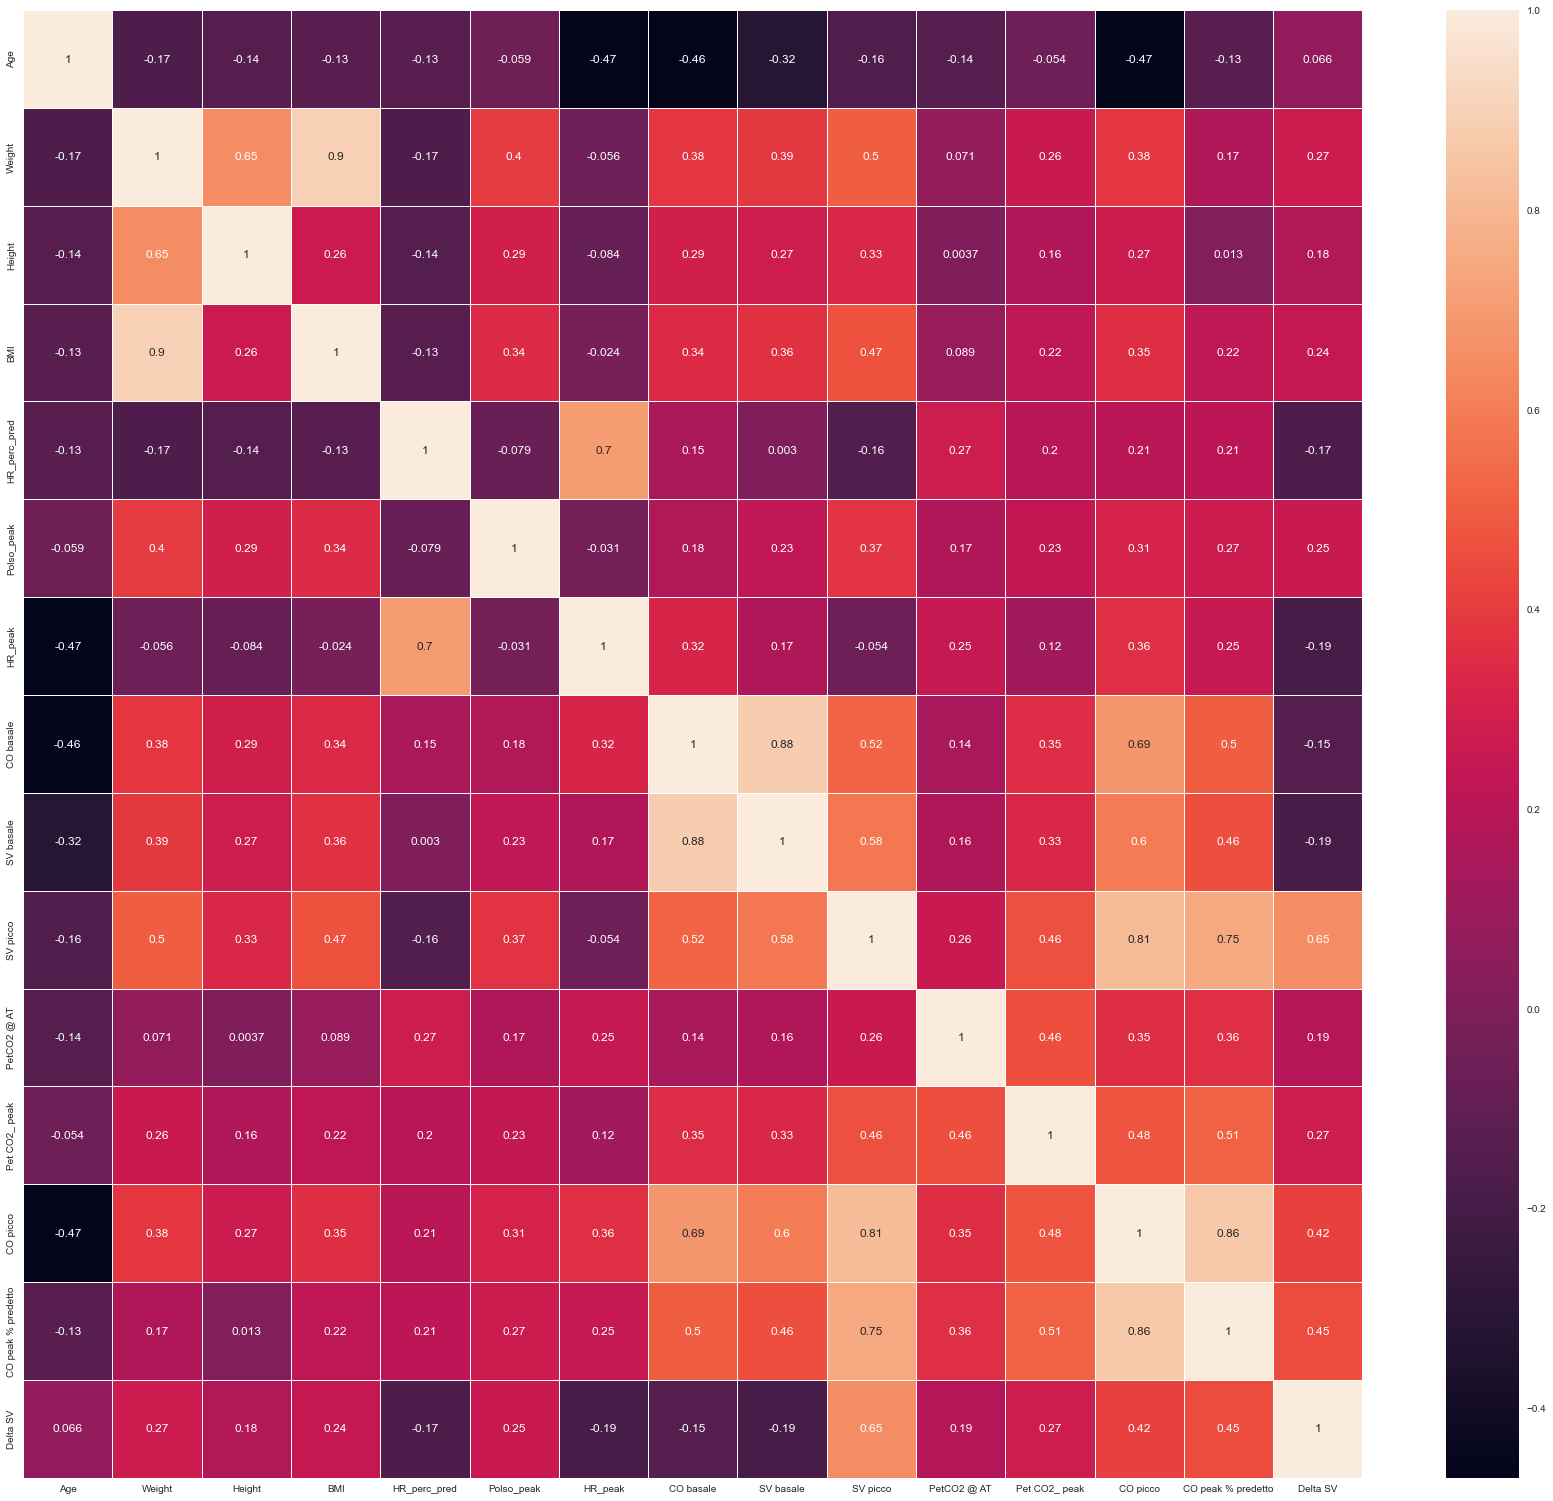

In [69]:
plt.figure(figsize = (30,27))
sns.heatmap(X[['Age',  
                'Weight',
                'Height',
                'BMI',
                'HR_perc_pred',
                'Polso_peak',
                'HR_peak',
                'CO basale',
                'SV basale',
                'SV picco',
                'PetCO2 @ AT',
                'Pet CO2_ peak',
                'CO picco',
                'CO peak % predetto',
                'Delta SV']].corr(),linewidth=.5,annot=True)
plt.show()

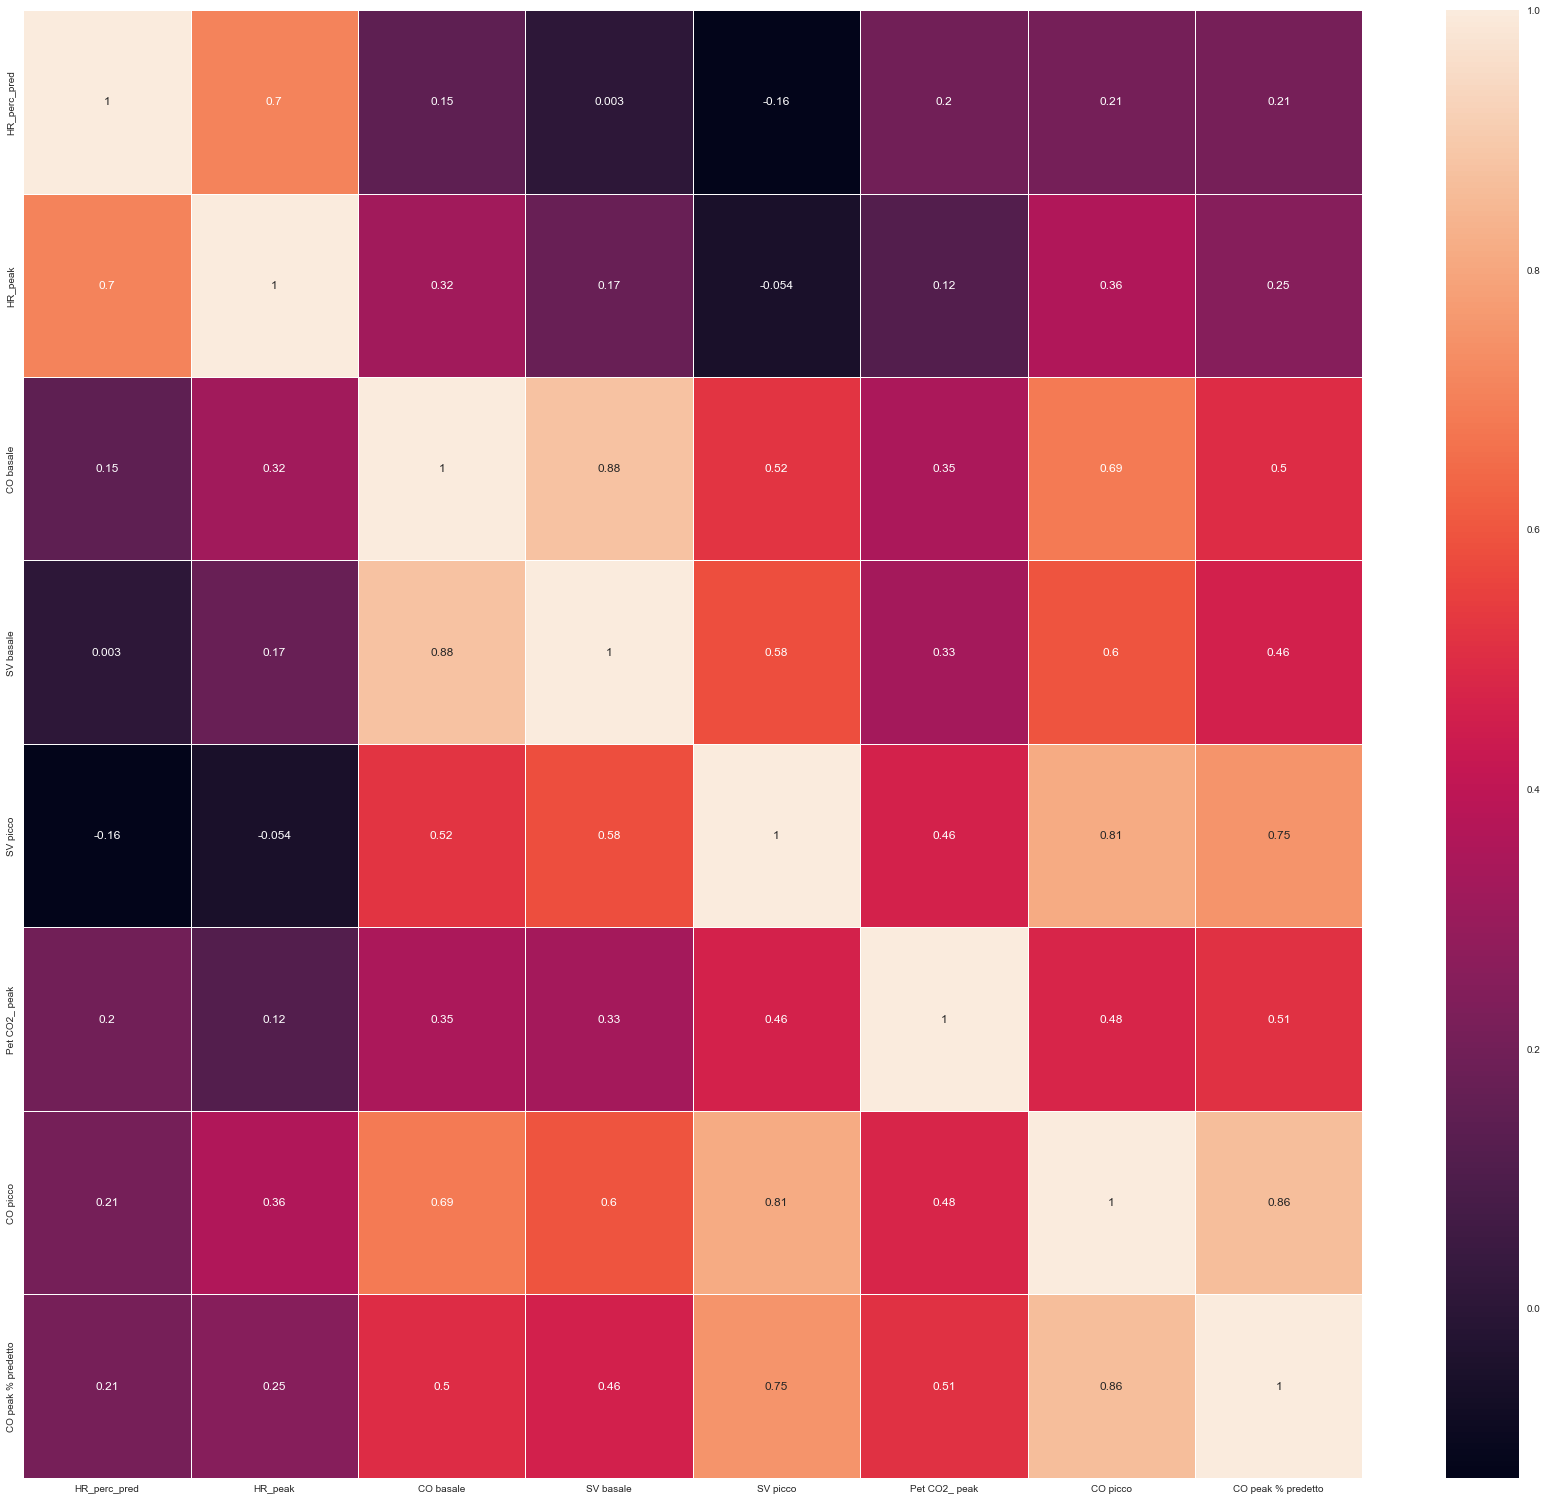

In [11]:
plt.figure(figsize = (30,27))
sns.heatmap(X[[ 'HR_perc_pred',
                'HR_peak',
                'CO basale',
                'SV basale',
                'SV picco',
                'Pet CO2_ peak',
                'CO picco',
                'CO peak % predetto',
                ]].corr(),linewidth=.5,annot=True,robust=True)
plt.show()

In [12]:
X.isnull().values.any()

False

In [13]:
y.isnull().values.any()

True

In [14]:
Y = y.fillna(0)
Y

0      4.2
1      3.3
2      4.4
3      4.0
4      3.0
      ... 
165    3.0
166    2.3
167    3.4
168    1.5
169    2.9
Name: CO basale, Length: 170, dtype: float64

In [8]:
y

0      8.1
1      6.0
2      7.9
3      8.2
4      5.8
      ... 
165    8.8
166    4.9
167    7.4
168    3.3
169    6.2
Name: CO picco, Length: 170, dtype: float64

In [15]:
Y.isnull().values.any()

False

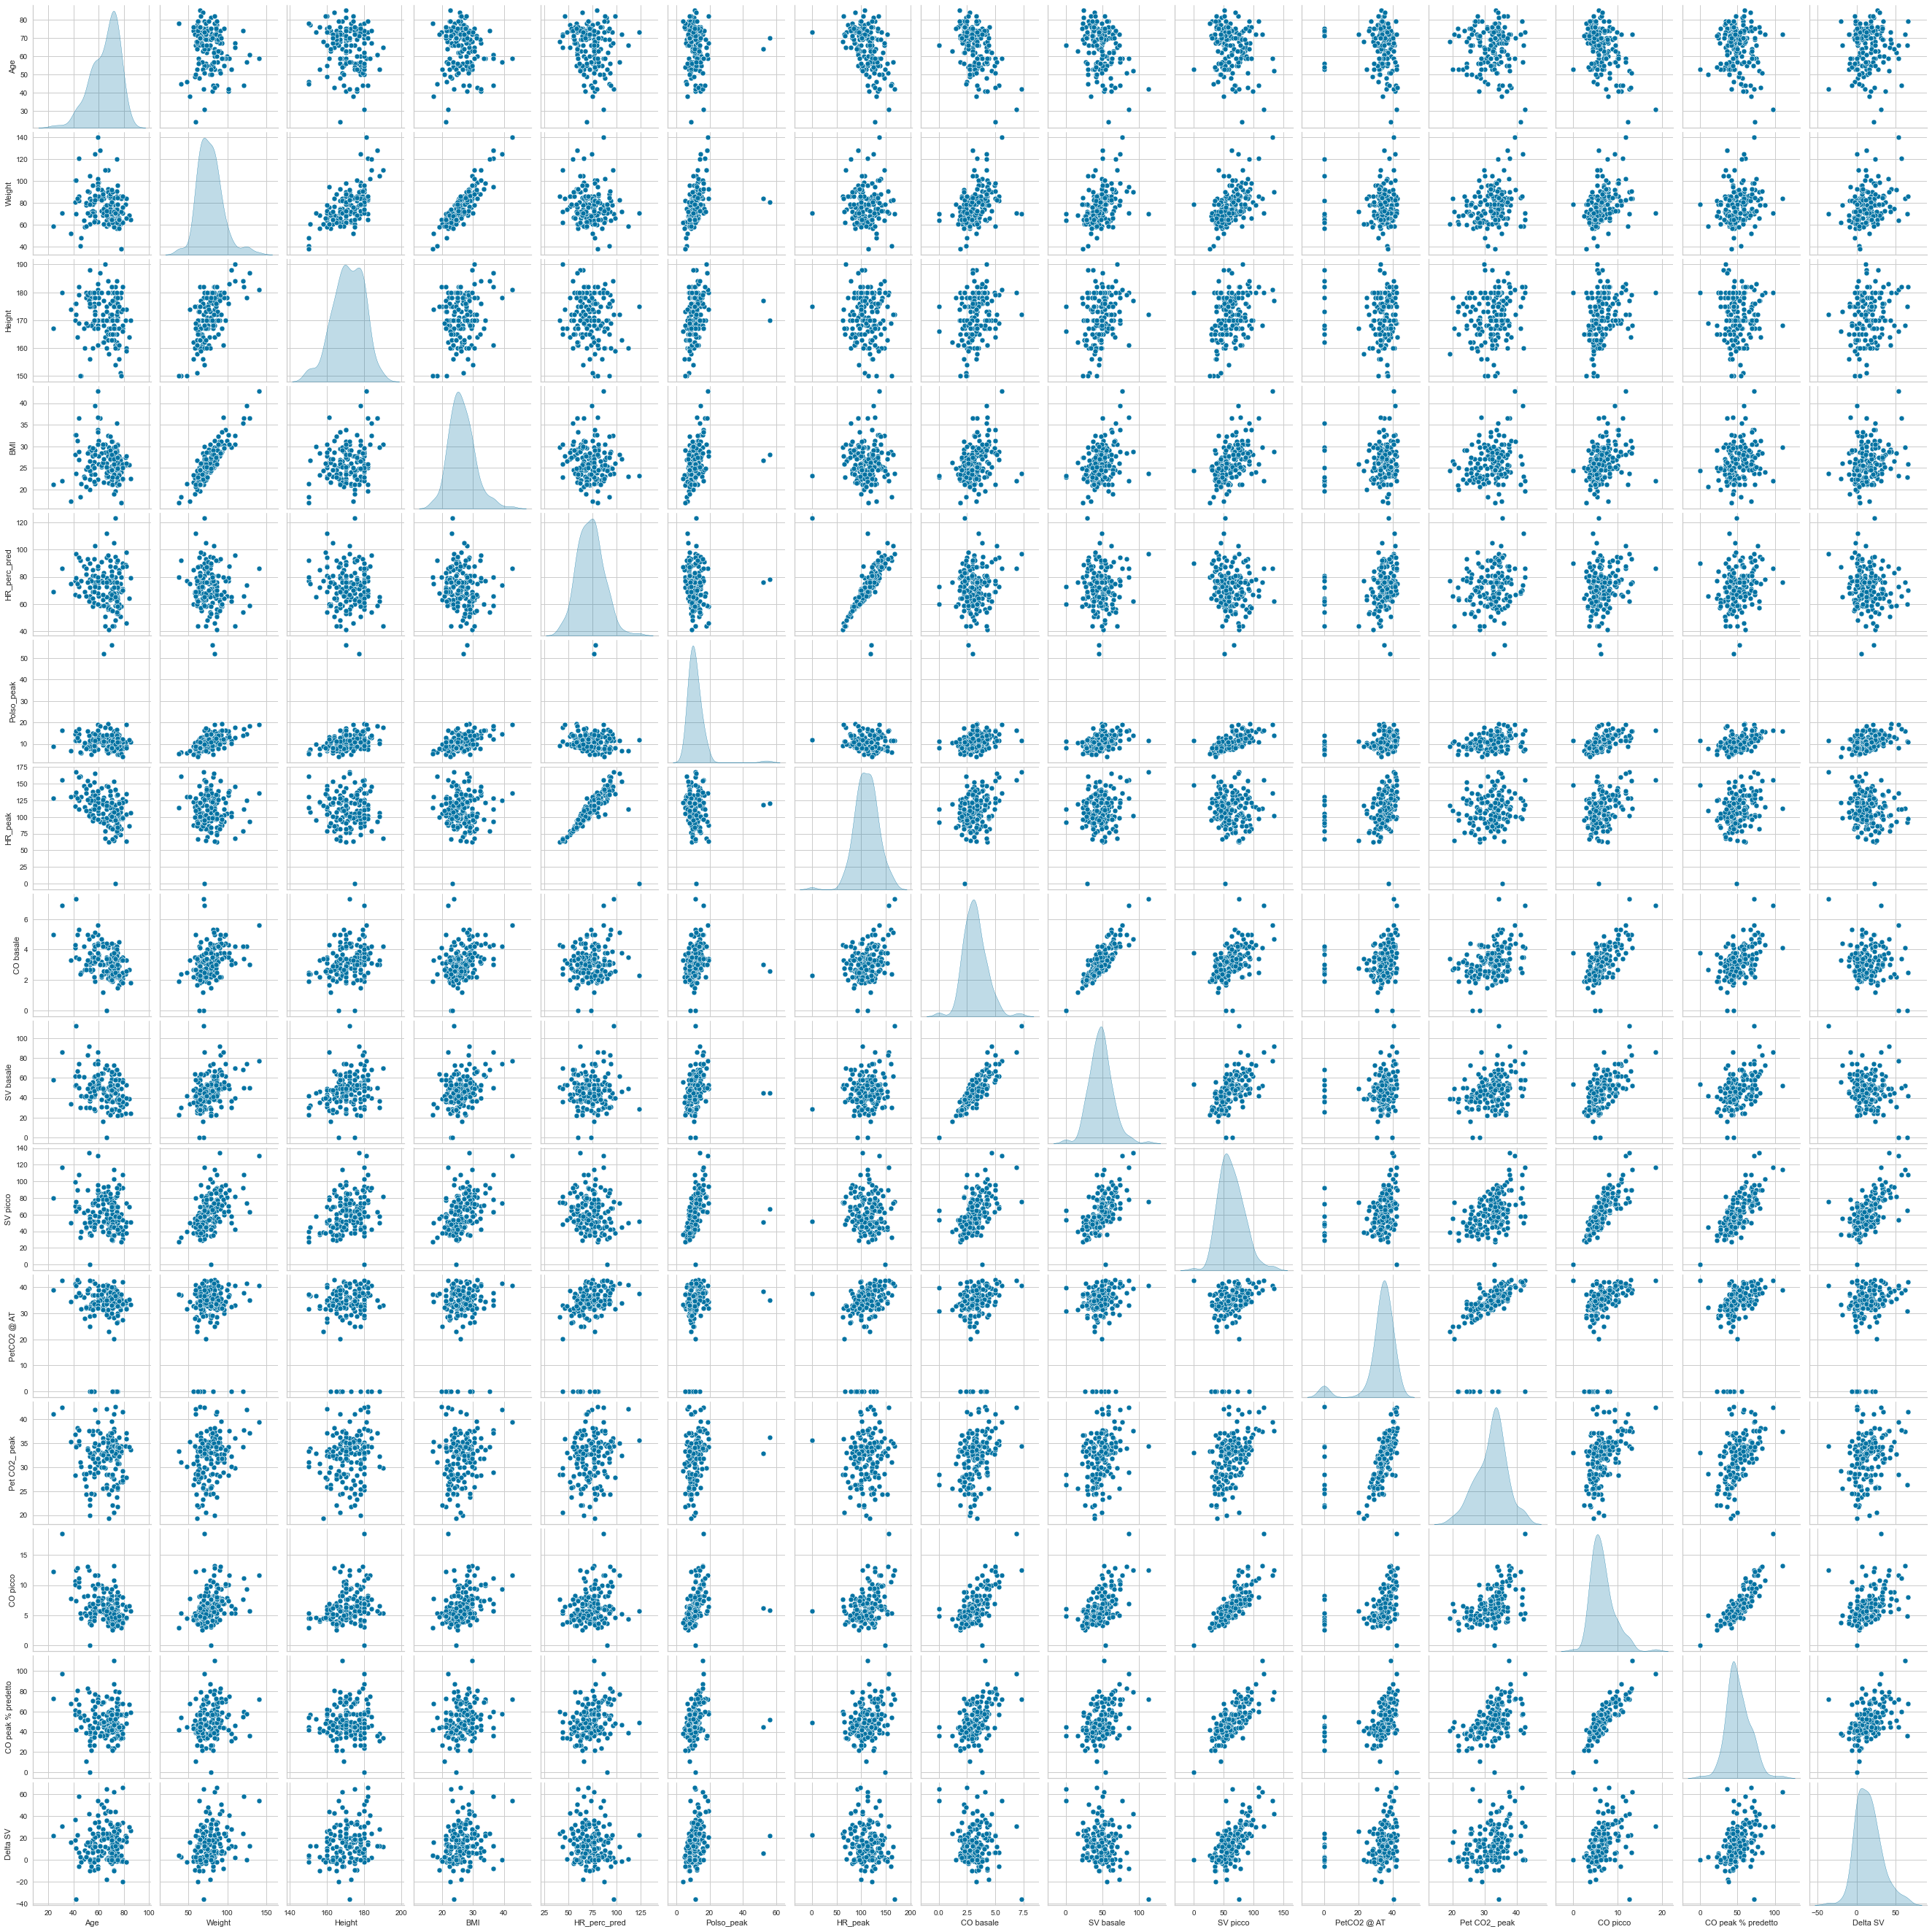

In [10]:
sns.pairplot(X[['Age',  
                'Weight',
                'Height',
                'BMI',
                'HR_perc_pred',
                'Polso_peak',
                'HR_peak',
                'CO basale',
                'SV basale',
                'SV picco',
                'PetCO2 @ AT',
                'Pet CO2_ peak',
                'CO picco',
                'CO peak % predetto',
                'Delta SV']],diag_kind="kde")


In [45]:

X = X[['Age',  
                'Weight',
                'Height',
                'BMI',
                'HR_perc_pred',
                'Polso_peak',
                'HR_peak',
                'CO basale',
                'SV basale',
                'SV picco',
                'PetCO2 @ AT',
                'Pet CO2_ peak',
                'CO picco',
                'CO peak % predetto',
                'Delta SV']]

In [65]:
#Decision Tree
regr=DecisionTreeRegressor(max_depth=3)
modelo=regr.fit(X,Y)
DT_prediction = modelo.predict(X)

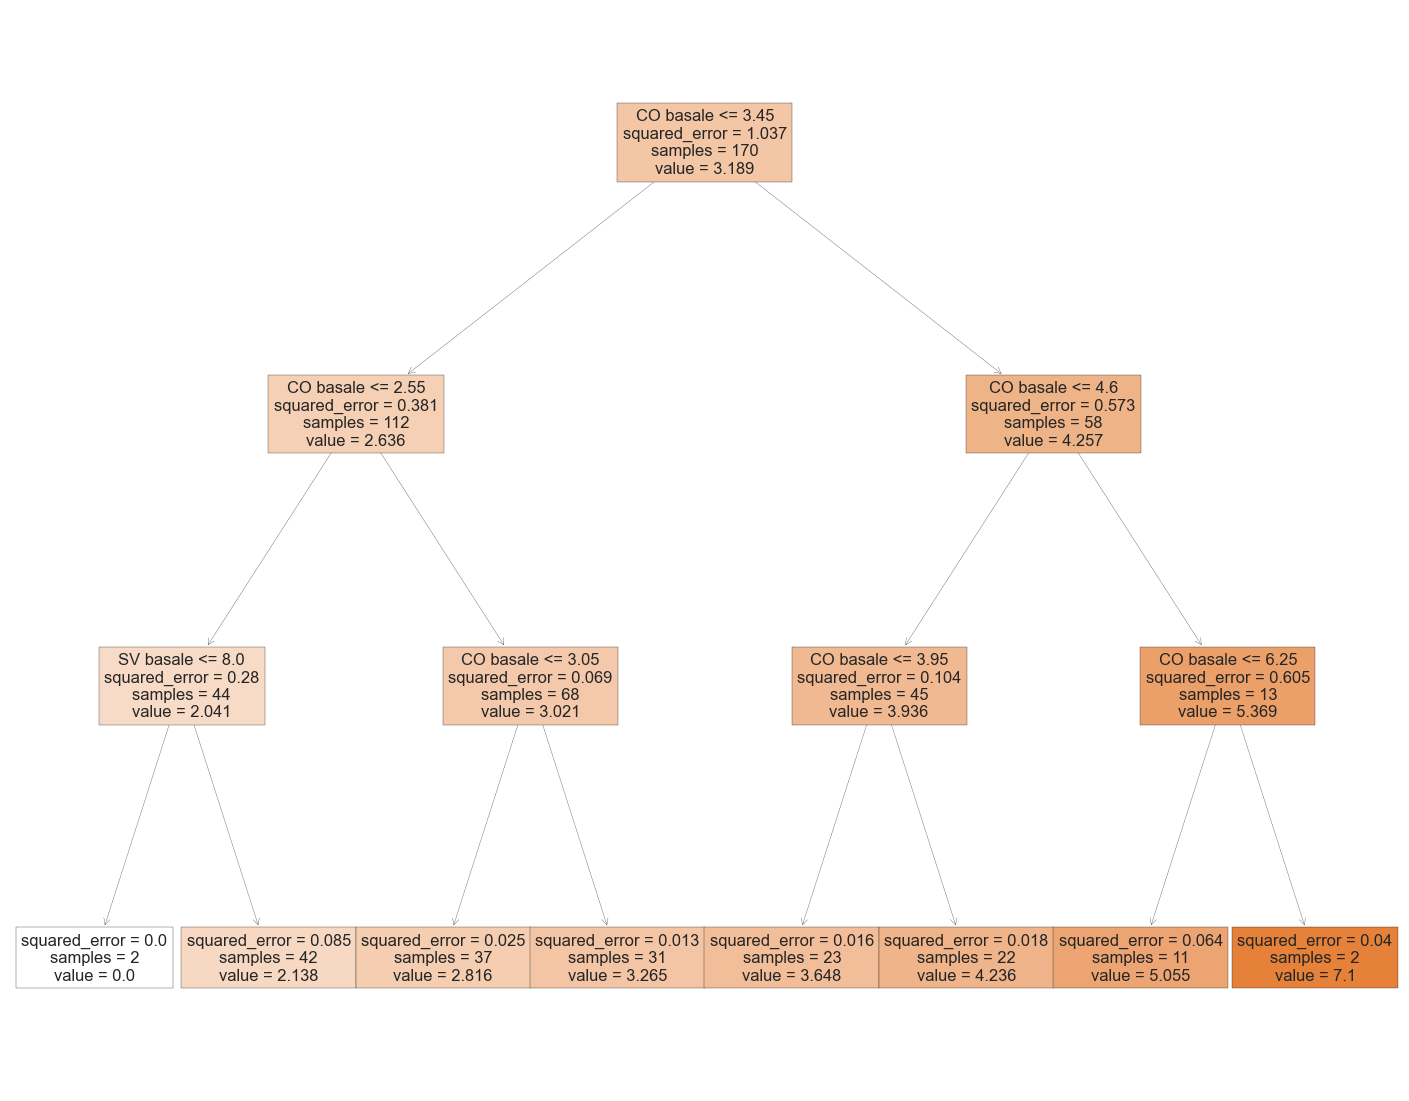

In [66]:
# Visualization of Regression model
fig=plt.figure(figsize=(25,20))
tree.plot_tree(modelo,feature_names=X.columns,filled=True)
plt.show()

In [50]:
X

,Age,Weight,Height,BMI,HR_perc_pred,Polso_peak,HR_peak,CO basale,SV basale,SV picco,PetCO2 @ AT,Pet CO2_ peak,CO picco,CO peak % predetto,Delta SV
0,48,64,167,22.948116,88,8.7,147.0,4.2,61.0,62.0,36.2,28.7,8.1,56.0,1.0
1,55,79,178,24.933720,58,8.6,94.0,3.3,55.0,63.0,36.9,36.9,6.0,39.0,8.0
2,63,90,172,30.421850,63,12.3,98.0,4.4,65.0,85.0,35.9,36.1,7.9,58.0,20.0
3,56,82,167,29.402273,81,11.3,130.0,4.0,53.0,73.0,0.0,34.5,8.2,55.0,20.0
4,75,74,171,25.306932,65,7.6,94.0,3.0,50.0,61.0,35.5,32.6,5.8,48.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,75,85,176,27.440599,92,12.6,134.0,3.0,53.0,86.0,33.7,34.3,8.8,73.0,33.0
166,76,65,175,21.224490,83,10.8,120.0,2.3,38.0,57.0,34.8,34.1,4.9,45.0,19.0
167,59,93,167,33.346481,60,16.2,96.0,3.4,63.0,71.0,31.9,31.8,7.4,69.0,0.0
168,75,79,178,24.933720,58,10.9,84.0,1.5,22.0,42.0,32.8,30.7,3.3,27.0,0.0


In [48]:
#Decision Tree Training
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.28)
regr = DecisionTreeRegressor(max_depth=3)
DT_scores = cross_val_score(regr,Xtrain,ytrain,cv=10)
DT_scores.mean(), DT_scores.std()

(0.8624023291089739, 0.13271343655645373)

In [49]:
MSE1 = mean_squared_error(Y, DT_prediction)
MSE1

0.037975639728135384

In [51]:
regr2 = DecisionTreeRegressor(max_depth=5)
DTmodel2=regr2.fit(X,Y)
DT2_prediction = DTmodel2.predict(X)
DT2_scores = cross_val_score(regr2,Xtrain,ytrain,cv=10)
print(DT2_scores.mean())
print(DT2_scores.std())
print("")
print("-------------------MSE--------------")
MSE2 = mean_squared_error(Y, DT2_prediction)
MSE2

0.9810148689130491
0.01689042523522263

-------------------MSE--------------


0.0021074543103954827

In [52]:
regr3 = DecisionTreeRegressor(max_depth=7)
DTmodel3=regr3.fit(X,Y)
DT3_prediction = DTmodel3.predict(X)
DT3_scores = cross_val_score(regr3,Xtrain,ytrain,cv=10)
DT3_scores.mean(), DT3_scores.std()

(0.9444500363528119, 0.081714387678254)

In [53]:
MSE3 = mean_squared_error(Y, DT3_prediction)
MSE3

6.264483659108035e-32

In [54]:
import math
MSE1 = np.square(np.subtract(Y,DT_prediction)).mean() 
 
RMSE1 = math.sqrt(MSE1)
print("Root Mean Square Error for DT1:\n")
print(RMSE1)

RMSE2 = np.square(np.subtract(Y,DT2_prediction)).mean() 
 
RMSE2 = math.sqrt(MSE2)
print("Root Mean Square Error for DT2:\n")
print(RMSE2)


RMSE3 = np.square(np.subtract(Y,DT2_prediction)).mean() 
 
RMSE3 = math.sqrt(MSE3)
print("Root Mean Square Error for DT3:\n")
print(RMSE3)

Root Mean Square Error for DT1:

0.19487339410020904
Root Mean Square Error for DT2:

0.04590701809522682
Root Mean Square Error for DT3:

2.502895055552277e-16


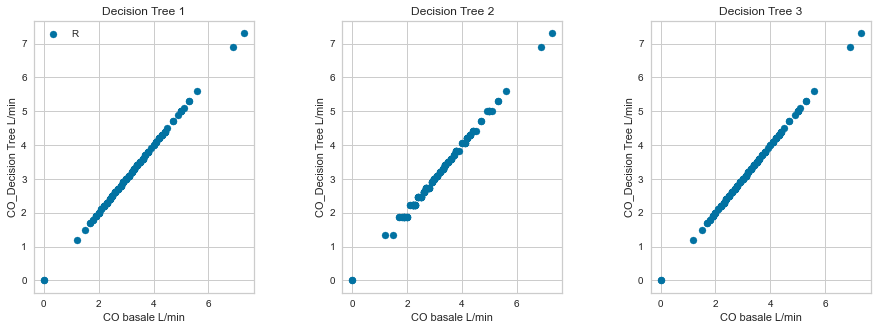

In [55]:
#Regresion Line

#slope, intercept = np.polyfit(X["CO basale"], Y,1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.scatter(X["CO basale"], Y)
#plt.plot(X["CO basale"], slope * X["CO basale"] + intercept, color='red')
ax1.set_xlabel('CO basale L/min')
ax1.set_ylabel('CO_Decision Tree L/min')
ax1.legend('Regression Line')
ax1.set_title('Decision Tree 1')

#slope2, intercept2 = np.polyfit(X["CO basale"], DT2_prediction,1)
ax2.scatter(X["CO basale"], DT2_prediction)
#plt.plot(X["CO basale"], slope2 * X["CO basale"] + intercept2, color='red')
ax2.set_xlabel('CO basale L/min')
ax2.set_ylabel('CO_Decision Tree L/min')
ax2.set_title('Decision Tree 2')

#slope3, intercept3 = np.polyfit(X["CO basale"], DT2_prediction,1)
ax3.scatter(X["CO basale"], DT3_prediction)
#plt.plot(X["CO basale"], slope2 * X["CO basale"] + intercept2, color='red')
ax3.set_xlabel('CO basale L/min')
ax3.set_ylabel('CO_Decision Tree L/min')
ax3.set_title('Decision Tree 3')

plt.subplots_adjust(wspace=0.4)
plt.show()

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


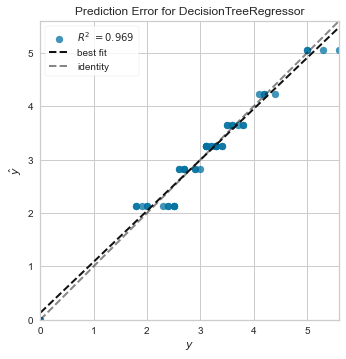

In [56]:
#Prediction Error
plt.figure("Cardiac output prediction")
plt.ylabel("CO Estimated(l/min)"),plt.xlabel("Reference CO (l/min)")
visualizer = prediction_error(modelo,Xtrain,ytrain,Xtest,ytest)
plt.show()

In [57]:
text_representation = tree.export_text(modelo)
print(text_representation)

|--- feature_7 <= 3.45
|   |--- feature_7 <= 2.55
|   |   |--- feature_7 <= 0.60
|   |   |   |--- value: [0.00]
|   |   |--- feature_7 >  0.60
|   |   |   |--- value: [2.14]
|   |--- feature_7 >  2.55
|   |   |--- feature_7 <= 3.05
|   |   |   |--- value: [2.82]
|   |   |--- feature_7 >  3.05
|   |   |   |--- value: [3.26]
|--- feature_7 >  3.45
|   |--- feature_7 <= 4.60
|   |   |--- feature_7 <= 3.95
|   |   |   |--- value: [3.65]
|   |   |--- feature_7 >  3.95
|   |   |   |--- value: [4.24]
|   |--- feature_7 >  4.60
|   |   |--- feature_7 <= 6.25
|   |   |   |--- value: [5.05]
|   |   |--- feature_7 >  6.25
|   |   |   |--- value: [7.10]



In [ ]:
#%pip install dtreeviz

In [58]:
#Random Forest
RF = RandomForestRegressor(max_depth=3,n_estimators=500)
RFmodel=RF.fit(X,Y)
RF_prediction = RFmodel.predict(X)
RF_scores=cross_val_score(RF,Xtrain,ytrain,cv=10)
RF_scores.mean(), RF_scores.std()

(0.9505520588371008, 0.05757556488754272)

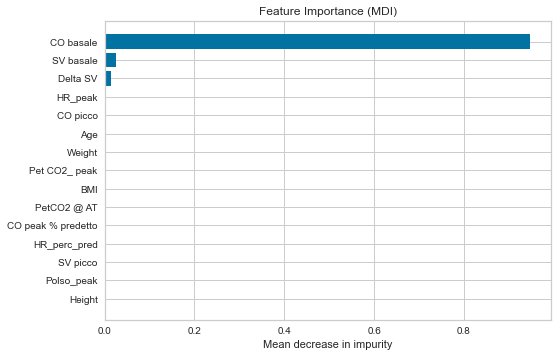

In [60]:
feature_importance = RF.feature_importances_
# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center",linewidth=0.8)

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

In [30]:
RF2 = RandomForestRegressor(max_depth=3,n_estimators=700)
RF2model=RF2.fit(X,Y)
RF2_prediction = RF2model.predict(X)
RF2_scores=cross_val_score(RF2,Xtrain,ytrain,cv=10)
RF2_scores.mean(), RF2_scores.std()

(0.9345978877323743, 0.07842652924861916)

In [31]:
RF3 = RandomForestRegressor(max_depth=5,n_estimators=500)
RF3model=RF2.fit(X,Y)
RF3_prediction = RF3model.predict(X)
RF3_scores=cross_val_score(RF3,Xtrain,ytrain,cv=10)
RF3_scores.mean(), RF3_scores.std()

(0.9429379273053741, 0.0749640013983562)

In [32]:
RF4 = RandomForestRegressor(max_depth=5,n_estimators=700)
RF4model=RF4.fit(X,Y)
RF4_prediction = RF4model.predict(X)
RF4_scores=cross_val_score(RF4,Xtrain,ytrain,cv=10)
RF4_scores.mean(), RF4_scores.std()

(0.9449991548014252, 0.0772649200856933)

In [33]:
#Metrics for RF model
RMSE4 = np.square(np.subtract(Y,RF_prediction)).mean()
RMSE4 = math.sqrt(RMSE4)
print("Root Mean Square Error for RF:\n")
print(RMSE4)

RMSE5 = np.square(np.subtract(Y,RF2_prediction)).mean()
RMSE5 = math.sqrt(RMSE5)
print("Root Mean Square Error for RF2:\n")
print(RMSE5)

RMSE6 = np.square(np.subtract(Y,RF3_prediction)).mean()
RMSE6 = math.sqrt(RMSE6)
print("Root Mean Square Error for RF3:\n")
print(RMSE6)

RMSE7 = np.square(np.subtract(Y,RF4_prediction)).mean()
RMSE7 = math.sqrt(RMSE7)
print("Root Mean Square Error for RF4:\n")
print(RMSE7)

Root Mean Square Error for RF:

0.14161965249484176
Root Mean Square Error for RF2:

0.14065921694471725
Root Mean Square Error for RF3:

0.1414477236769587
Root Mean Square Error for RF4:

0.0928796188439103


In [163]:
print("-------------MSE4-----------------")
MSE4 = mean_squared_error(Y, RF_prediction, multioutput='raw_values')
print(MSE4)

print("-------------MSE5-----------------")
MSE5 = mean_squared_error(Y, RF2_prediction, multioutput='raw_values')
print(MSE5)

print("-------------MS6-----------------")
MSE6 = mean_squared_error(Y, RF3_prediction, multioutput='raw_values')
print(MSE6)


print("-------------MS7-----------------")
MSE7 = mean_squared_error(Y, RF4_prediction, multioutput='raw_values')
print(MSE7)

-------------MSE4-----------------
[0.10593858]
-------------MSE5-----------------
[0.10697208]
-------------MS6-----------------
[0.11293211]
-------------MS7-----------------
[0.04541371]


In [ ]:
# Set figure size
plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(RF_prediction)
plt.legend(["Real CO", "Decision Tree - 3"], loc ="lower right")
plt.show()

In [16]:
train_stats = Xtrain.describe()
train_stats

,Age,Weight,Height,BMI,Ramp_protocol CPET,Lenght,VO2_AT,VO2_AT_Kg,HR_AT,Watt_AT,...,Bblockers,ACE,AT1,Diuretic,Antialdo,Digitalis,FEV1,FEV1%,FVC,FVC%
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,64.909836,78.868852,171.844262,26.551929,8.991803,9.259934,757.131148,9.550408,83.467213,45.926230,...,0.860656,0.622951,0.155738,0.713115,0.573770,0.049180,1.542623,54.163934,2.099918,57.868852
std,10.810925,16.380270,8.334951,4.292934,3.351319,1.572896,357.927504,3.861653,26.435696,24.954229,...,0.347733,0.486646,0.364102,0.454173,0.496567,0.217136,1.242509,41.924048,1.664926,44.378714
min,31.000000,38.000000,150.000000,16.888889,4.000000,5.625000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,67.250000,166.250000,23.530320,6.000000,8.020833,585.000000,8.003165,76.000000,32.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,78.000000,173.000000,26.199143,9.000000,9.422222,726.500000,9.726357,86.000000,46.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.900000,74.000000,2.680000,76.000000
75%,73.000000,86.750000,178.000000,29.064919,10.000000,10.500000,942.750000,11.329478,100.750000,61.250000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.397500,85.000000,3.305000,90.750000
max,85.000000,140.000000,190.000000,42.733738,18.000000,12.750000,1760.000000,22.366197,127.000000,140.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.070000,125.000000,5.530000,137.000000


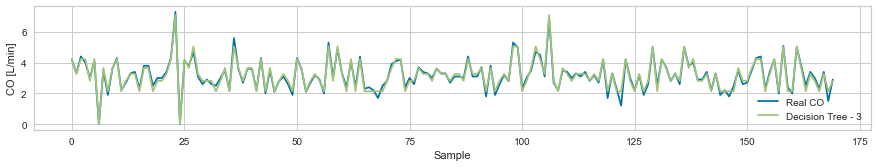

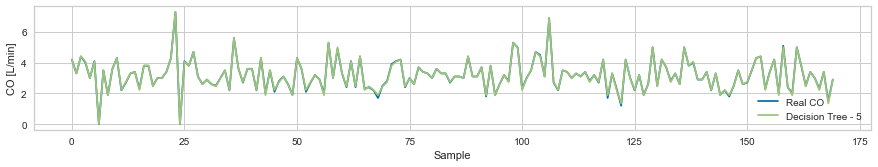

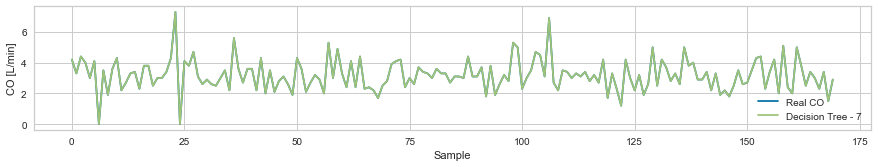

In [28]:
# Set figure size
plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(DT_prediction)
plt.legend(["Real CO", "Decision Tree - 3"], loc ="lower right")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(DT2_prediction)
plt.legend(["Real CO", "Decision Tree - 5"], loc ="lower right")
plt.show()

# Set figure size
plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(DT3_prediction)
plt.legend(["Real CO", "Decision Tree - 7"], loc ="lower right")
plt.show()

In [79]:
#GRADIENT BOOST
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(random_state=3,n_estimators=1000)
GB.fit(Xtrain, ytrain)
GB_predict = GB.predict(Xtest)
GB_scores=cross_val_score(GB,Xtrain,ytrain,cv=10)
GB_scores


array([0.9999997 , 0.98744728, 0.99850493, 0.99598233, 0.99877297,
       0.99765131, 0.99554749, 0.99999997, 0.95138032, 0.87937774])

In [80]:
#GRADIENT BOOST
from sklearn.ensemble import GradientBoostingRegressor
GB2 = GradientBoostingRegressor(random_state=5,n_estimators=500)
GB2.fit(Xtrain, ytrain)

GB2_predict = GB2.predict(Xtest)
GB2.score(Xtest, ytest)

0.9437235573584686

In [69]:
from sklearn import metrics
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )
    

In [75]:
ndf = [Reg_Models_Evaluation_Metrics(GB,Xtrain,ytrain,Xtest,ytest,y_predict)]

GB_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
GB_score.insert(0, 'Model', 'Gradient Boosting')
GB_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Gradient Boosting,0.943806,0.917465,0.980466,0.256423


<AxesSubplot:>

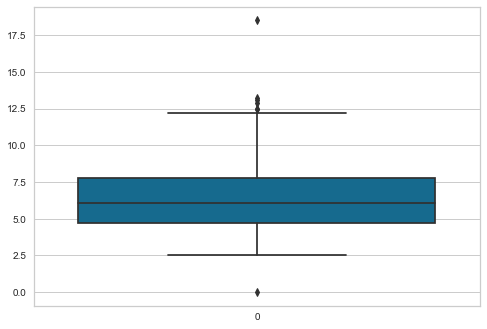

In [27]:
sns.boxplot(data=X['CO picco'])

In [82]:
ndf2 = [Reg_Models_Evaluation_Metrics(GB2,Xtrain,ytrain,Xtest,ytest,GB2_predict)]

GB2_score = pd.DataFrame(data = ndf2, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
GB2_score.insert(0, 'Model', 'Gradient Boosting')
GB2_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Gradient Boosting,0.943724,0.917344,0.978273,0.256611


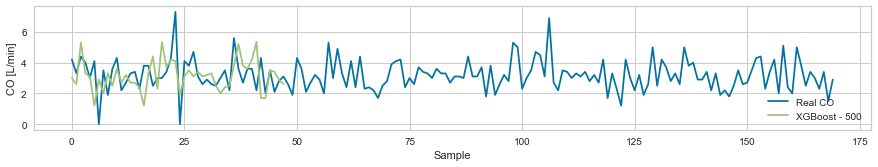

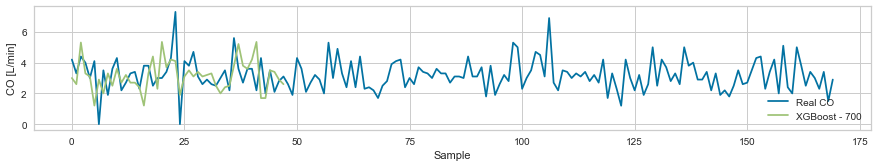

In [84]:
# Set figure size
plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(GB_predict)
plt.legend(["Real CO", "XGBoost - 500"], loc ="lower right")
plt.show()


plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(GB2_predict)
plt.legend(["Real CO", "XGBoost - 700"], loc ="lower right")
plt.show()

In [ ]:
GB_predict=pd.DataFrame(GB_predict)
GB_predict

In [32]:
Real=pd.DataFrame(Y)
Real


,CO picco
0,8.1
1,6.0
2,7.9
3,8.2
4,5.8
...,...
165,8.8
166,4.9
167,7.4
168,3.3


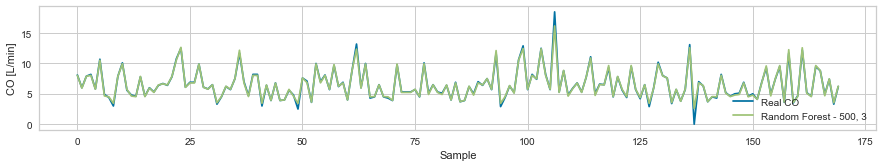

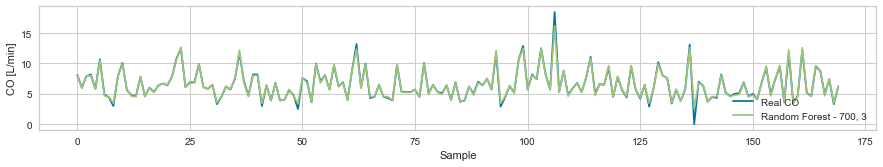

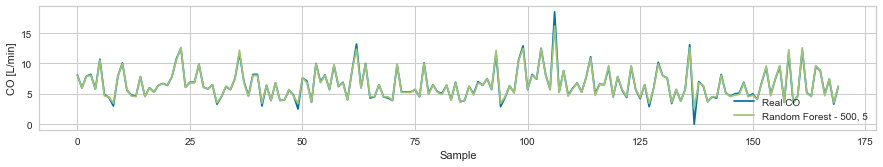

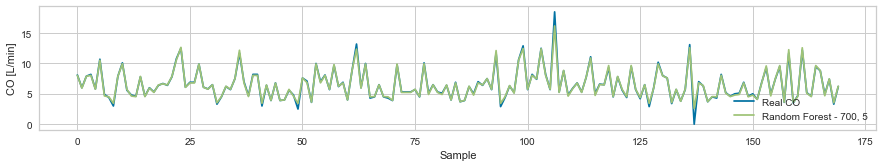

In [164]:
# Set figure size
plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(RF_prediction)
plt.legend(["Real CO", "Random Forest - 500, 3"], loc ="lower right")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(RF_prediction)
plt.legend(["Real CO", "Random Forest - 700, 3"], loc ="lower right")
plt.show()

# Set figure size
plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(RF_prediction)
plt.legend(["Real CO", "Random Forest - 500, 5"], loc ="lower right")
plt.show()

# Set figure size
plt.figure(figsize=(15, 5))
plt.subplot(2,1,2)
plt.ylabel("CO [L/min]")
plt.xlabel("Sample")
# Create plot
plt.plot(Y)
plt.plot(RF_prediction)
plt.legend(["Real CO", "Random Forest - 700, 5"], loc ="lower right")
plt.show()